# Pluie en Australie

Cet ensemble de données contient environ 10 ans d’observations météorologiques quotidiennes provenant de nombreux endroits à travers l’Australie.

RainTomorrow est la variable cible à prévoir. Ça veut dire qu’il a plu le lendemain, oui ou non ? Cette colonne est oui si la pluie pour ce jour était de 1mm ou plus.

*Date : Date of occurance

*Location: Where does it rain

*MinTemp:   The lowest temperature recorded during the day

*MaxTemp:   The highest temperature recorded during the day

*Rainfall:  The numerics of rainfall in scalable format

*Evaporation:  The Evaporation of water in scalable format

*Sunshine:   The sunshine chances

*WindGustDir:     Wind Direction

*WindGustSpeed:   The speed of wind gust

*WindDir9am:  Wind direction during 9.00 am

*WindDir3pm: Wind direction during 3.00 pm

*WindSpeed9am: Wind direction during 9.00 am

*WindSpeed3pm: Wind direction during 3.00 pm

*Humidity9am: Humidity during 9.00 am

*Humidity3pm: Humidity during 3.00 pm

*Pressure9am: Air Pressure during 9.00 am

*Pressure3pm: Air Pressure during 3.00 pm

*Cloud9am: Clouds Visbility during 9.00 am

*Cloud3pm: Cloud Visbility during 3.00 pm

*Temp9am: Temperture during 9.00 am

*Temp3pm: Temperture during 3.00 pm

*RainToday: chance of rain during Today

*RainTomorrow: chance of rain during tomorrow

# I. Traitement des données

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# import the class
from sklearn.linear_model import LogisticRegression
# import the metrics class
import sklearn.datasets as sk_d
import sklearn.model_selection as sk_ms
import sklearn.linear_model as sk_lm 
import sklearn.ensemble as sk_e
import sklearn.svm as sk_s
import sklearn.preprocessing as sk_p
import networkx as nx
import sklearn.metrics as sk_m
import sklearn.decomposition as sk_de
import sklearn.cluster as sk_c
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]>

In [ ]:
# Comptage des valeurs nulles/manquantes par colonnes
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Nous avons beaucoup de colonne qui ont des  valeurs null, on va supprimer les colonnes avec des données vide

In [ ]:
#calcul du nombre de colonne vide en pourcentage
colonne_vide = df.apply(lambda x: f'{(x.isnull().sum()/df.shape[0]).round(2)} %').sort_values()
colonne_vide

Date              0.0 %
Location          0.0 %
Temp9am          0.01 %
WindSpeed9am     0.01 %
MinTemp          0.01 %
MaxTemp          0.01 %
Rainfall         0.02 %
Temp3pm          0.02 %
WindSpeed3pm     0.02 %
RainToday        0.02 %
Humidity9am      0.02 %
RainTomorrow     0.02 %
Humidity3pm      0.03 %
WindDir3pm       0.03 %
WindDir9am       0.07 %
WindGustSpeed    0.07 %
WindGustDir      0.07 %
Pressure9am       0.1 %
Pressure3pm       0.1 %
Cloud9am         0.38 %
Cloud3pm         0.41 %
Evaporation      0.43 %
Sunshine         0.48 %
dtype: object

In [ ]:
#on va supprimer ceux dont le pourcentage est supérieur à 10%
df.drop(colonne_vide.index.to_list()[-4:], axis = 1, inplace = True)

In [ ]:
def get_cols(df) -> list:
    '''
    function return list of name numbers and categorials columns
    '''
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

num_cols, cat_cols = get_cols(df)

In [ ]:
from sklearn.impute import SimpleImputer


imp_mean_num = SimpleImputer(strategy='mean')
imp_mean_cat = SimpleImputer(strategy='most_frequent')

for col in df.columns.to_list():
    if col in num_cols:
        df[col] = imp_mean_num.fit_transform(df[[col]])
    else:
        df[col] = imp_mean_cat.fit_transform(df[[col]])

In [ ]:
# revoir s'il ya des données manquantes
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
lbl_enc = LabelEncoder()
# transformer les valeurs sur la colonne en order 1&2
df.loc[:,"RainTomorrow"] = lbl_enc.fit_transform(df['RainTomorrow'].values)
df['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [ ]:
df.loc[:, "Location"] = lbl_enc.fit_transform(df['Location'].values)
df['Location'].value_counts()

9     3436
37    3344
7     3193
31    3193
18    3193
15    3193
13    3193
0     3193
8     3040
39    3040
47    3040
6     3040
5     3040
14    3040
3     3040
17    3040
2     3040
1     3040
22    3040
23    3040
24    3039
30    3039
40    3039
27    3009
35    3009
46    3009
45    3009
44    3009
4     3009
42    3009
38    3009
10    3009
11    3009
12    3009
48    3009
34    3009
33    3009
32    3009
19    3009
20    3009
21    3009
29    3009
28    3009
43    3006
26    3004
36    3001
16    1578
41    1578
25    1578
Name: Location, dtype: int64

In [ ]:
df.loc[:, "WindGustDir"] = lbl_enc.fit_transform(df['WindGustDir'].values)
df['WindGustDir'].value_counts()

13    20241
9      9418
3      9313
10     9216
0      9181
8      9168
15     9069
12     8967
11     8736
14     8252
7      8122
1      8104
2      7372
4      7133
6      6620
5      6548
Name: WindGustDir, dtype: int64

In [ ]:
df.loc[:, "WindDir9am"] = lbl_enc.fit_transform(df['WindDir9am'].values)
df['WindDir9am'].value_counts()


3     22324
9      9287
0      9176
10     9112
7      8749
8      8659
13     8459
12     8423
5      8129
6      7980
1      7836
4      7671
2      7630
11     7587
14     7414
15     7024
Name: WindDir9am, dtype: int64

In [ ]:
df.loc[:, "WindDir3pm"] = lbl_enc.fit_transform(df['WindDir3pm'].values)
df['WindDir3pm'].value_counts()


9     15066
13    10110
8      9926
15     9518
10     9399
12     9354
3      8890
14     8874
7      8610
2      8505
0      8472
4      8263
11     8156
6      7870
1      7857
5      6590
Name: WindDir3pm, dtype: int64

In [ ]:
df.loc[:, "RainToday"] = lbl_enc.fit_transform(df['RainToday'].values)
df['RainToday'].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [ ]:
df.drop(['Date'], axis = 1, inplace = True)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,41,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,41,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,41,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


# II. Modèlisation


**Sous échantillonnage**

In [ ]:
df1=df.loc[df.RainTomorrow==1,:].sample(200)
df2=df.loc[df.RainTomorrow==0,:].sample(200)

In [ ]:
df3=df1.append(df2)

In [ ]:
X = df3.drop(["RainTomorrow"], axis=1)
Y = df3["RainTomorrow"]


In [ ]:
Y

15245     1
30205     1
5252      1
118498    1
91398     1
         ..
88835     0
19771     0
70239     0
16556     0
24040     0
Name: RainTomorrow, Length: 400, dtype: int64

In [ ]:
# Découpage des donnees en apprentissage/test
x_app,x_test,y_app,y_test =train_test_split(X,Y,train_size=0.7)
x_app=pd.DataFrame(x_app,columns=X.columns)
x_test=pd.DataFrame(x_test,columns=X.columns)
y_app=pd.DataFrame(y_app,columns=['RainTomorrow'])
y_test=pd.DataFrame(y_test,columns=['RainTomorrow'])

In [ ]:
# 3 familles de modèles :
models = {}

# 3 modèles de forêts aléatoires avec des tailles de forêts différentes
for n_estimator_i in [10,50,100]:
    models['randomForest_{}'.format(n_estimator_i)] = sk_e.RandomForestClassifier(n_estimators=n_estimator_i)
    
# 3 modèles de regression régularisée
for alpha_i in [1,100,1000]:
    models['linearRegression_{}'.format(alpha_i)] = sk_lm.RidgeClassifier(alpha=alpha_i)
    
# 3 modèles de machines à vecteurs de support (SVM) avec des paramètres de régularisation différents
for c_i in [1,50,100]:
    models['SVC_{}'.format(c_i)] = sk_s.LinearSVC(C=c_i)

In [ ]:
# Apprentissage des modèles sur le jeu d'apprentissage
val_results = []
estimators = [1, 50, 200]
for model_i in models.keys(): 
    models[model_i].fit(x_app,y_app) 
    Yp_val = models[model_i].predict(x_test)
    acc = sk_m.accuracy_score(y_test,Yp_val)
    pre = sk_m.precision_score(y_test,Yp_val,average='macro')
    rec = sk_m.recall_score(y_test,Yp_val,average='macro')
    val_results.append([model_i,round(acc*100,0),round(pre*100,1),round(rec*100,1)])
    
val_results = pd.DataFrame(val_results,columns=['model','acc','pre','rec'])
val_results

,model,acc,pre,rec
0,randomForest_10,68.0,67.2,66.8
1,randomForest_50,64.0,63.8,63.9
2,randomForest_100,64.0,63.8,63.9
3,linearRegression_1,74.0,74.0,74.2
4,linearRegression_100,71.0,70.6,70.6
5,linearRegression_1000,70.0,69.8,69.9
6,SVC_1,72.0,72.3,72.5
7,SVC_50,64.0,73.8,60.5
8,SVC_100,50.0,73.7,54.5


In [ ]:
models_selected = ['randomForest_50','linearRegression_1000','SVC_100']

x_app_val = x_app.append(x_test,ignore_index=True)
y_app_val = y_app.append(y_test,ignore_index=True)

test_results = []

for model_i in models_selected: 
    models[model_i].fit(x_app_val,y_app_val)
    Yp_test = models[model_i].predict(x_test)
    acc = sk_m.accuracy_score(y_test,Yp_test)
    pre = sk_m.precision_score(y_test,Yp_test,average='macro')
    rec = sk_m.recall_score(y_test,Yp_test,average='macro')
    test_results.append([model_i,round(acc*100,0),round(pre*100,1),round(rec*100,1)])

test_results = pd.DataFrame(test_results,columns=['model','acc','pre','rec'])
test_results

,model,acc,pre,rec
0,randomForest_50,100.0,100.0,100.0
1,linearRegression_1000,74.0,73.9,73.8
2,SVC_100,55.0,66.7,58.6


In [ ]:
class_report = classification_report(y_test,Yp_val)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        66
           1       0.47      1.00      0.64        54

    accuracy                           0.50       120
   macro avg       0.74      0.55      0.40       120
weighted avg       0.76      0.50      0.38       120



**Regression Logistique**

In [ ]:
#creation du modele sans l'entrainer
model_LR = LogisticRegression(solver="liblinear", class_weight="balanced")

In [ ]:
#entrainement
model_LR.fit(x_app,y_app)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Test
y_pred_LR = model_LR.predict(x_test)

In [ ]:
# recuperation de la matrice de confusion
matrix_LR = confusion_matrix(y_test,y_pred_LR)

In [ ]:
#pour afficher la matrice de confusion
print(matrix_LR)

[[48 18]
 [15 39]]


Text(91.68, 0.5, 'Valeurs reelles')

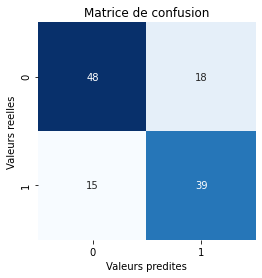

In [ ]:
# pareil mais en mieux
sns.heatmap(matrix_LR, square=True, annot=True,cbar=False, fmt='g', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel("Valeurs predites")
plt.ylabel("Valeurs reelles")
#plt.show()

In [ ]:
class_report = classification_report(y_test,y_pred_LR)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        66
           1       0.68      0.72      0.70        54

    accuracy                           0.73       120
   macro avg       0.72      0.72      0.72       120
weighted avg       0.73      0.72      0.73       120



In [ ]:
#recuperation du recall moyen [VP/(VP+FN) + (VN/(VN+FP)]/2
precision, recall,fscore,support = score(y_test, y_pred_LR, average='macro')
print(recall)

0.7247474747474747


# III. Selection des variables

In [ ]:
def apprentissage(X,Y):
    #print("Debut du KFold")
    NOMBRE_KFOLD = 10

    Kf = KFold(n_splits=NOMBRE_KFOLD)
    Kf.get_n_splits(X)
    moyenne = 0
    for train_index, test_index in Kf.split(X):
        #print("Train :", train_index, "Test :", test_index)
        x_app=X[train_index]
        y_app=Y[train_index]
        x_test=X[test_index]
        y_test=Y[test_index]
        model_LR = LogisticRegression(solver="liblinear", class_weight="balanced")
        model_LR.fit(x_app, y_app)
        y_pred_LR = model_LR.predict(x_test)
        matrix_LR = confusion_matrix(y_test, y_pred_LR)
        #print(matrix_LR)
        precision, recall,fscore,support = score(y_test, y_pred_LR, average='macro',zero_division=0)
        #print(recall)
        moyenne = moyenne + recall

    moyenne = moyenne / NOMBRE_KFOLD
    return moyenne


print("Resultat de l'apprentissage avec toutes les variables : ", apprentissage(X.values,Y.values))


Resultat de l'apprentissage avec toutes les variables :  0.375


In [ ]:
# Afficher la liste des variables
colonnes = list(df3.columns)

In [ ]:
# Enlever un element de la liste
colonnes.remove("RainTomorrow")


In [ ]:
# Exemple de generation de listes aleatoires : au moins une variable, au maximum toutes les variables
for i in range(10):
    print(random.sample(colonnes,random.randint(1,len(colonnes))))



print("#######################################################################################""")

['WindSpeed9am', 'WindGustDir', 'Pressure3pm', 'WindSpeed3pm', 'MaxTemp']
['Pressure3pm', 'Humidity3pm']
['WindSpeed9am', 'WindGustSpeed', 'WindDir3pm', 'Temp3pm', 'RainToday', 'MinTemp', 'WindDir9am', 'Pressure9am']
['MaxTemp']
['MinTemp', 'Pressure3pm', 'WindDir9am', 'WindDir3pm', 'WindSpeed3pm', 'WindSpeed9am', 'Rainfall', 'WindGustDir', 'Temp9am', 'Pressure9am', 'MaxTemp', 'Temp3pm', 'RainToday', 'Location', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']
['Pressure9am', 'Location', 'Rainfall', 'MinTemp', 'WindSpeed9am', 'WindDir9am', 'Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'WindGustDir', 'RainToday', 'WindSpeed3pm']
['MaxTemp', 'RainToday']
['Temp9am', 'Humidity3pm', 'MinTemp', 'WindSpeed9am', 'RainToday', 'MaxTemp', 'WindDir9am', 'WindSpeed3pm', 'Pressure9am', 'Humidity9am', 'Location']
['Temp3pm', 'Temp9am', 'RainToday', 'Pressure9am', 'WindGustDir', 'MinTemp', 'Rainfall', 'WindSpeed3pm', 'Location']
['WindDir9am', 'Pressure3pm', 'Pressure9am', 'MaxTemp']
#################

In [ ]:
# On realise Un certain nombre d'apprentissages en selectionnant aleatoirement les variables utilisees
best_score = 0
best_variables = []
for i in range(100):
    variables = random.sample(colonnes, random.randint(1, len(colonnes)))
    variables_a_supprimer = list(set(colonnes)-set(variables))+["RainTomorrow"]
    X = df3.drop(variables_a_supprimer, axis=1).values
    resultat = apprentissage(X,Y.values)
    if(resultat>best_score):
        best_score = resultat
        best_variables = variables.copy()
        print("Resultat de l'apprentissage : ", resultat)
print("Meilleur apprentissage realise avec les variables suivantes : ")

Resultat de l'apprentissage :  0.3775
Resultat de l'apprentissage :  0.37875000000000003
Resultat de l'apprentissage :  0.38625
Meilleur apprentissage realise avec les variables suivantes : 


In [ ]:
print(best_variables)

['Humidity3pm', 'WindGustDir', 'MinTemp', 'Pressure9am', 'Temp9am', 'WindGustSpeed', 'WindDir3pm', 'WindSpeed9am', 'MaxTemp', 'Humidity9am', 'Pressure3pm', 'WindSpeed3pm']


In [ ]:
print("Liste des variables qui perturbent la qualite predictive : ")
print(list(set(colonnes)-set(best_variables)))

Liste des variables qui perturbent la qualite predictive : 
['RainToday', 'WindDir9am', 'Temp3pm', 'Rainfall', 'Location']


#IV. Algorithme genetique

In [ ]:
########## Debut de l'algorithme genetique

def generation_population_initiale(taille,colonnes):
    population = []
    for i in range(taille):
        individu = [random.randint(0,1) for i in range(len(colonnes))]
        population.append(individu)
    return population

In [ ]:
def reproduction(population):
    taille_individu = len(population[0]) # taille d'un individu
    print("taille d'un individu",taille_individu)
    couples = [i for i in range(len(population))]
    print(couples)
    random.shuffle(couples)
    print(couples)
    for i in range(len(couples)//2):
        #print(couples[i*2],couples[i*2+1])
        coupe = random.randint(1,taille_individu)
        #print(coupe)
        #print("Voici le couple ",i, ":")
        #print(couples[i*2], "et", couples[i*2+1])
        #print(population[couples[i*2]])
        #print(population[couples[i * 2+1]])
        #print("On coupe a l'indice ", coupe)
        #print("Leur enfant est le suivant :")
        #print(population[couples[i*2]][0:coupe]+population[couples[i*2+1]][coupe:])
        population.append(population[couples[i*2]][0:coupe]+population[couples[i*2+1]][coupe:])
    return population

In [ ]:

def mutation(population, nb_mutants, nb_mutations):
    taille_individu = len(population[0])
    for i in range(nb_mutants):
        m = random.randint(0,len(population)-1)
        copie = population[m].copy()
        for j in range(nb_mutations):
            gene = random.randint(0,taille_individu-1)
            #print(population[m])
            #print(gene)
            if copie[gene] == 0:
                copie[gene] = 1
            else:
                copie[gene] = 0
        population.append(copie)
    return population

In [ ]:
def selection(colonnes, population,X,Y):
    taille_individu = len(population[0])
    resultat_scores = {}
    for i in range(len(population)):
        variables = []
        #print(population[i])
        for j in range(taille_individu):
            if population[i][j] == 1:
                variables.append(colonnes[j])
        #print(variables)
        variables_a_supprimer = list(set(colonnes) - set(variables)) + ["RainTomorrow"]
        X = df3.drop(variables_a_supprimer, axis=1).values
        resultat = apprentissage(X, Y)
        resultat_scores[i] = resultat
        #print(resultat)
    #print(resultat_scores)
    #print(len(population))
    for i in range(len(population)//2):
        minimum = min(resultat_scores,key=resultat_scores.get)
#        print(minimum, len(population))
#        population.pop(minimum)
        del resultat_scores[minimum]

    nouvelle_population = []
    for i in resultat_scores:
        nouvelle_population.append(population[i].copy())
    maximum = max(resultat_scores, key=resultat_scores.get)
    return (resultat_scores[maximum], resultat_scores, nouvelle_population)
#        print(len(resultat_scores),"resu")
        #print(min(resultat_scores,key=resultat_scores.get))
#    print(population)
#    
#    print(len(population))



In [ ]:
population = generation_population_initiale(10,colonnes)
for i in range(300):
    population = reproduction(population)
    population = mutation(population,5,3)
    (maximum,resultat_scores,population) = selection(colonnes,population,X,Y.values)
    print(maximum)
    print(variables)
    #print(score)


taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 3, 9, 0, 2, 5, 8, 1, 6, 7]
0.3837499999999999
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 3, 9, 2, 6, 0, 8, 7, 5]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 8, 1, 4, 7, 6, 0, 9, 5, 3]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[6, 8, 4, 3, 7, 9, 1, 2, 0, 5]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 5, 8, 9, 7, 2, 3, 4, 6]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 7, 0, 4, 8, 6, 9, 3, 5, 1]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 6, 8, 1, 4, 2, 5, 7, 3, 9]
0.39249999999999996
['WindGustSpeed']
taille d'un individu 17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 7, 3, 6, 9, 4, 1, 5, 0, 8]
0.39249999999999996
['WindGustSpeed']
taille d'

In [ ]:
resultat_scores

{5: 0.39374999999999993,
 6: 0.39374999999999993,
 7: 0.39374999999999993,
 8: 0.39374999999999993,
 9: 0.39374999999999993,
 10: 0.39374999999999993,
 11: 0.39374999999999993,
 12: 0.39374999999999993,
 13: 0.39374999999999993,
 14: 0.39374999999999993}

In [ ]:
population

[[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]]

les variables selectionnées par l'algo génétique sont au nombre de 7 sur les 22 :
["Location", "Rainfall", "WindGustSpeed", "WindDir3pm","WindSpeed9am",	"WindSpeed3pm", "Humidity3pm"]

#V. Theorie des graphes

In [ ]:
df3

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15245,24,14.5,19.7,2.6,13,40.03523,3,3,0.0,4.0,84.0,75.0,1017.64994,1015.255889,16.6,18.8,1,1
30205,37,12.8,22.0,0.2,13,40.03523,13,10,19.0,31.0,55.0,46.0,1020.90000,1020.600000,15.9,21.2,0,1
5252,4,12.8,15.8,83.6,11,61.00000,11,11,26.0,24.0,92.0,85.0,1020.90000,1018.800000,13.2,13.3,1,1
118498,32,11.3,20.0,5.4,12,41.00000,13,15,9.0,13.0,78.0,75.0,1022.50000,1021.100000,16.1,17.8,1,1
91398,14,22.5,27.2,35.4,2,52.00000,0,2,39.0,35.0,100.0,86.0,1015.40000,1014.100000,24.1,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88835,8,17.0,27.9,0.0,4,31.00000,9,4,15.0,20.0,60.0,66.0,1015.30000,1012.200000,24.7,26.4,0,0
19771,26,14.8,25.4,0.0,4,44.00000,8,4,2.0,28.0,75.0,74.0,1016.10000,1009.500000,18.5,23.3,0,0
70239,18,17.8,36.7,0.0,3,52.00000,5,3,9.0,26.0,55.0,26.0,1006.20000,1002.900000,25.0,32.6,0,0
16556,24,13.4,24.2,0.0,13,40.03523,8,9,4.0,9.0,77.0,53.0,1017.64994,1015.255889,19.6,23.0,0,0


In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import preprocessing
import community as community_louvain
from sklearn.preprocessing import normalize
# Pairwise distance
from sklearn.metrics import pairwise_distances
from networkx.algorithms import community
import networkx as nx

**Normalisation**

In [ ]:
# Normalisation
x = normalize(x_app)
y = pd.DataFrame(y_app,columns=["RainTomorrow"])
x = pd.DataFrame(x,columns=["Location",	"MinTemp",	"MaxTemp",	"Rainfall",	"WindGustDir",	"WindGustSpeed",	"WindDir9am",	"WindDir3pm",	"WindSpeed9am",	"WindSpeed3pm",	"Humidity9am",	"Humidity3pm",	"Pressure9am",	"Pressure3pm",	"Temp9am",	"Temp3pm", "RainToday"])

In [ ]:
x

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.022273,0.013016,0.019976,0.000000,0.010441,0.029930,0.005568,0.010441,0.010441,0.016705,0.046634,0.033410,0.705501,0.704109,0.014965,0.019628,0.000000
1,0.032137,0.005949,0.010667,0.000000,0.008889,0.028034,0.008889,0.006838,0.008889,0.015043,0.033504,0.038974,0.705779,0.704685,0.008479,0.010188,0.000000
2,0.006856,0.003908,0.009393,0.001097,0.005485,0.013712,0.005485,0.005485,0.004799,0.008913,0.066506,0.030167,0.705508,0.704480,0.004525,0.008982,0.000686
3,0.013195,0.010903,0.022293,0.000000,0.005556,0.022918,0.003472,0.006945,0.006250,0.011806,0.049309,0.018057,0.706917,0.703792,0.012154,0.021321,0.000000
4,0.005586,0.016408,0.017944,0.000559,0.001396,0.024437,0.006982,0.005586,0.010473,0.011869,0.059347,0.057253,0.704699,0.703163,0.017315,0.017595,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.000699,0.006498,0.012018,0.002655,0.009083,0.027973,0.007686,0.006288,0.004192,0.013040,0.059390,0.036011,0.705761,0.703875,0.007895,0.015150,0.000699
276,0.026684,0.012218,0.020434,0.000000,0.003511,0.047048,0.003511,0.002809,0.009129,0.021768,0.036515,0.036515,0.706490,0.702487,0.016853,0.018749,0.000000
277,0.006222,0.005116,0.008020,0.000000,0.006222,0.026963,0.006222,0.006914,0.010370,0.013827,0.052544,0.053926,0.705607,0.703602,0.007882,0.007121,0.000000
278,0.004851,0.012404,0.019680,0.000000,0.000000,0.018017,0.008315,0.001386,0.002772,0.007623,0.048507,0.036727,0.706331,0.704114,0.016284,0.018086,0.000000


In [ ]:
# Calcul des distances par paire d'échantillons
dist = pairwise_distances(x)
dist = pd.DataFrame(dist,columns=x.index,index=x.index)
dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,0.000000,0.024577,0.038299,0.021890,0.034593,0.019257,0.022043,0.042831,0.035607,0.019364,0.025002,0.030107,0.017652,0.018856,0.025549,0.018033,0.046795,0.035222,0.033591,0.027168,0.021446,0.043873,0.019210,0.036281,0.022752,0.030643,0.023597,0.029053,0.053560,0.016738,0.029332,0.033111,0.028319,0.046646,0.043762,0.071311,0.031806,0.037088,0.026485,0.026217,...,0.031067,0.022589,0.039433,0.023165,0.026737,0.025070,0.037911,0.040904,0.036973,0.027431,0.029985,0.030664,0.025897,0.037485,0.051728,0.030226,0.023272,0.026313,0.045348,0.026963,0.025815,0.029787,0.022352,0.044972,0.028969,0.019200,0.040351,0.030569,0.020206,0.039170,0.024978,0.018397,0.034880,0.020189,0.035200,0.029972,0.023899,0.034256,0.028374,0.026378
1,0.024577,0.000000,0.045987,0.037808,0.045748,0.026389,0.039807,0.045109,0.048600,0.031153,0.039478,0.031100,0.034707,0.035517,0.032435,0.016521,0.048455,0.031374,0.042067,0.041198,0.025591,0.045590,0.017514,0.034040,0.031461,0.023809,0.023455,0.038961,0.056246,0.025053,0.046480,0.045067,0.037163,0.049595,0.053027,0.075901,0.038569,0.046063,0.021532,0.037679,...,0.037047,0.028651,0.052681,0.037235,0.037039,0.036720,0.039400,0.039548,0.035195,0.025170,0.043800,0.033735,0.035655,0.045016,0.052662,0.036971,0.027542,0.035035,0.045517,0.039154,0.028296,0.033229,0.022582,0.043454,0.034045,0.027447,0.047336,0.042201,0.030233,0.034278,0.038739,0.029379,0.031720,0.020052,0.038946,0.041597,0.028446,0.035991,0.039031,0.038417
2,0.038299,0.045987,0.000000,0.031842,0.037837,0.036328,0.040443,0.043425,0.052227,0.042613,0.038101,0.027225,0.040090,0.044501,0.024987,0.037503,0.067944,0.050950,0.045967,0.023151,0.027939,0.048929,0.043684,0.039713,0.034289,0.044296,0.036536,0.027398,0.073528,0.040005,0.032526,0.029212,0.041644,0.045364,0.042271,0.071592,0.036012,0.045646,0.039809,0.037466,...,0.054108,0.029280,0.062784,0.038360,0.035914,0.029112,0.038704,0.045296,0.025541,0.038088,0.028350,0.044708,0.032136,0.046775,0.065299,0.043956,0.030279,0.031998,0.070497,0.040487,0.024274,0.032712,0.036077,0.045561,0.050140,0.029330,0.018778,0.033252,0.048865,0.035462,0.029220,0.031182,0.033313,0.038426,0.042260,0.020682,0.055570,0.031847,0.029187,0.035710
3,0.021890,0.037808,0.031842,0.000000,0.042919,0.027636,0.027596,0.029779,0.040235,0.031609,0.031254,0.027225,0.030589,0.027614,0.033098,0.025316,0.044121,0.041293,0.024204,0.018211,0.020692,0.058625,0.027785,0.046486,0.016974,0.046349,0.035549,0.034305,0.063990,0.022762,0.019827,0.034427,0.041854,0.057368,0.050654,0.078197,0.043219,0.049723,0.037888,0.020271,...,0.027395,0.030366,0.039632,0.033733,0.036654,0.017299,0.050141,0.052065,0.037447,0.041289,0.030439,0.042375,0.026339,0.052692,0.068923,0.045012,0.033097,0.015661,0.043801,0.015856,0.029185,0.037802,0.022024,0.057266,0.026333,0.023740,0.041174,0.040198,0.034782,0.047361,0.031100,0.023124,0.046030,0.025997,0.045716,0.028847,0.037857,0.043012,0.024387,0.013966
4,0.034593,0.045748,0.037837,0.042919,0.000000,0.037335,0.026754,0.057372,0.041537,0.029538,0.032883,0.048534,0.033282,0.034394,0.032239,0.041608,0.072825,0.054258,0.050583,0.040465,0.039107,0.033085,0.044075,0.025572,0.046787,0.036482,0.039399,0.015547,0.063952,0.038126,0.047356,0.030472,0.032162,0.029977,0.015830,0.062897,0.031748,0.038197,0.043063,0.043845,...,0.060034,0.025838,0.059038,0.026699,0.035689,0.038864,0.028058,0.037310,0.046354,0.034739,0.018471,0.036179,0.024841,0.021140,0.046688,0.017785,0.024571,0.043116,0.072397,0.047890,0.031966,0.027179,0.044902,0.031249,0.054747,0.031076,0.032813,0.022346,0.034067,0.035690,0.019408,0.029001,0.036350,0.043755,0.030353,0.028689,0.045399,0.022795,0.026524,0.041223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# Seuillage pour mettre à l'infini les distances supérieures au seuil
seuil = 0.5
dist_seuil = dist.copy(deep=True)
n_length = dist_seuil.shape[0]
edges = []
for i in range(n_length):
  for j in range(n_length):
    # Seuillage si distance trop élevé
    if dist_seuil.iloc[i,j] > seuil:
      dist_seuil.iloc[i,j] = np.inf
    # Si pas seuillage -> ajout à la liste des arêtes
    else:
      edges.append((i,j))

In [ ]:
# Définition des noeuds
nodes = [x for x in range(n_length)]

In [ ]:
# Définition du graphe, ajout des noeuds et arêtes
G =  nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

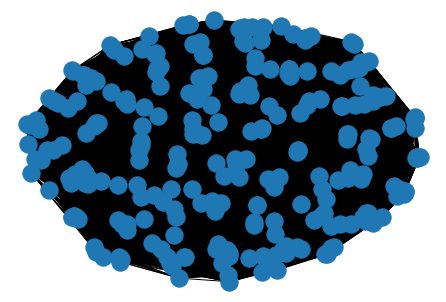

In [ ]:
# Rendu graphique du graphe
nx.draw(G)

In [ ]:
# Algorithme de détection de communauté
communities_generator = community.girvan_newman(G)
# En génère plus d'une, itérer sur toutes les combinaisons possibles avec next()
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

In [ ]:
# Mise en forme des communautés
comm = sorted(map(sorted, next_level_communities))
comm[0]
comm[1]
comm[2]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 1

In [ ]:
# Rendu graphique avec une coloration selon la communauté
G2 =  nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)
color_map = []
for node in G:
  if node in comm[0]:
    color_map.append('blue')
  elif node in comm[1]:
    color_map.append('green')
  elif node in comm[2]:
    color_map.append('red')
  else:
    color_map.append('yellow')
  

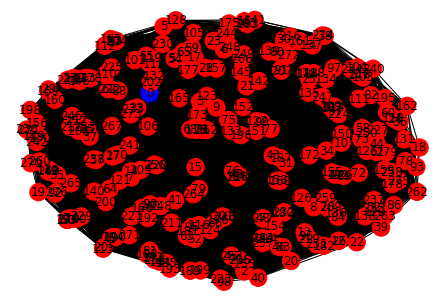

In [ ]:
# Dessin du graphe
nx.draw(G2, node_color=color_map, with_labels=True)
plt.show()

# Theorie des graphes avec les  variables selectionnées par l'Algorithme génétique

"Location", "Rainfall", "WindGustSpeed", "WindDir3pm	WindSpeed9am",	"WindSpeed3pm", "Humidity3pm"

In [ ]:
# Normalisation
x = x_app
y = pd.DataFrame(y_app,columns=["RainTomorrow"])
x = pd.DataFrame(x,columns=["Location","Rainfall","WindGustSpeed","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am"])

In [ ]:
# Calcul des distances par paire d'échantillons
dist = pairwise_distances(x)
dist = pd.DataFrame(dist,columns=x.index,index=x.index)

In [ ]:
# Seuillage pour mettre à l'infini les distances supérieures au seuil
seuil = 0.1
dist_seuil = dist.copy(deep=True)
n_length = dist_seuil.shape[0]
edges = []
for i in range(n_length):
  for j in range(n_length):
    # Seuillage si distance trop élevé
    if dist_seuil.iloc[i,j] > seuil:
      dist_seuil.iloc[i,j] = np.inf
    # Si pas seuillage -> ajout à la liste des arêtes
    else:
      edges.append((i,j))

In [ ]:
# Définition des noeuds
nodes = [x for x in range(n_length)]

In [ ]:
# Définition du graphe, ajout des noeuds et arêtes
G =  nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

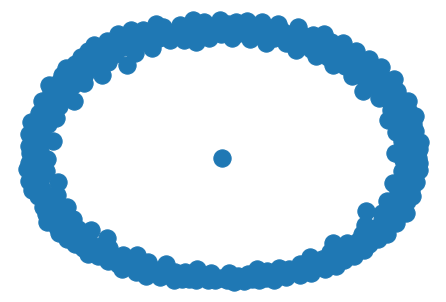

In [ ]:
# Rendu graphique du graphe
nx.draw(G)

In [ ]:
# Algorithme de détection de communauté
communities_generator = community.girvan_newman(G)
# En génère plus d'une, itérer sur toutes les combinaisons possibles avec next()
#top_level_communities = next(communities_generator)
#next_level_communities = next(communities_generator)

In [ ]:
# Mise en forme des communautés
comm = sorted(map(sorted, next_level_communities))
comm[0]
comm[1]
comm[2]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 1

In [ ]:
# Rendu graphique avec une coloration selon la communauté
G2 =  nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)
color_map = []
for node in G:
  if node in comm[0]:
    color_map.append('blue')
  elif node in comm[1]:
    color_map.append('green')
  elif node in comm[2]:
    color_map.append('red')
  else:
    color_map.append('yellow')

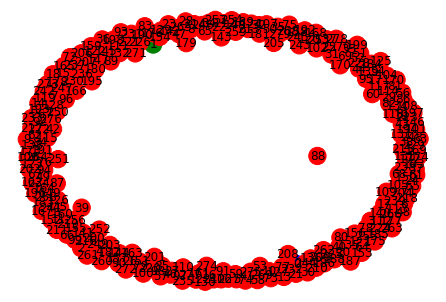

In [ ]:
# Dessin du graphe
nx.draw(G2, node_color=color_map, with_labels=True)
plt.show()